In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# Import data
#df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
START_DATE = '2018-01-01'
END_DATE = '2019-12-31'
df = data.DataReader(['AAPL', 'GOOGL','AMZN','TSLA'], 
                     'yahoo', 
                     start=START_DATE, 
                     end=END_DATE)
df.head()

Attributes  Adj Close                                           Close  \
Symbols          AAPL        GOOGL         AMZN       TSLA       AAPL   
Date                                                                    
2018-01-02  41.075405  1073.209961  1189.010010  64.106003  43.064999   
2018-01-03  41.068253  1091.520020  1204.199951  63.450001  43.057499   
2018-01-04  41.259007  1095.760010  1209.589966  62.924000  43.257500   
2018-01-05  41.728764  1110.290039  1229.140015  63.316002  43.750000   
2018-01-08  41.573769  1114.209961  1246.869995  67.281998  43.587502   

Attributes                                            High               ...  \
Symbols           GOOGL         AMZN       TSLA       AAPL        GOOGL  ...   
Date                                                                     ...   
2018-01-02  1073.209961  1189.010010  64.106003  43.075001  1075.979980  ...   
2018-01-03  1091.520020  1204.199951  63.450001  43.637501  1096.099976  ...   
2018-01-04  1095.760010  1209.589966  62.924000  43.367500  1104.079956  ...   
2018-01-05  1110.290039  1229.140015  63.316002  43.842499  1113.579956  ...   
2018-01-08  1114.209961  1246.869995  67.281998  43.902500  1119.160034  ...   

Attributes          Low                  Open                            \
Symbols            AMZN       TSLA       AAPL        GOOGL         AMZN   
Date                                                                      
2018-01-02  1170.510010  62.200001  42.540001  1053.020020  1172.000000   
2018-01-03  1188.300049  63.110001  43.132500  1073.930054  1188.300049   
2018-01-04  1204.660034  61.136002  43.134998  1097.089966  1205.000000   
2018-01-05  1210.000000  62.400002  43.360001  1103.449951  1217.510010   
2018-01-08  1232.030029  63.099998  43.587502  1111.000000  1236.000000   

Attributes                  Volume                                    
Symbols          TSLA         AAPL      GOOGL       AMZN        TSLA  
Date                                                                  
2018-01-02  62.400002  102223600.0  1588300.0  2694500.0  21761000.0  
2018-01-03  64.199997  118071600.0  1565900.0  3108800.0  22607500.0  
2018-01-04  62.574001   89738400.0  1302600.0  3022100.0  49731500.0  
2018-01-05  63.324001   94640000.0  1512500.0  3544700.0  22956000.0  
2018-01-08  63.200001   82271200.0  1232200.0  4279500.0  49297000.0  

[5 rows x 24 columns]

In [3]:
# Closing price
df = df['Close']
df.head()

Symbols,AAPL,GOOGL,AMZN,TSLA
Date,,,,
2018-01-02,41.075405,1073.209961,1189.010010,64.106003
2018-01-03,41.068253,1091.520020,1204.199951,63.450001
2018-01-04,41.259007,1095.760010,1209.589966,62.924000
2018-01-05,41.728764,1110.290039,1229.140015,63.316002
2018-01-08,41.573769,1114.209961,1246.869995,67.281998


In [4]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,GOOGL,AMZN,TSLA
Symbols,,,,
AAPL,0.000303,0.000178,0.000206,0.000190
GOOGL,0.000178,0.000269,0.000216,0.000168
AMZN,0.000206,0.000216,0.000363,0.000209
TSLA,0.000190,0.000168,0.000209,0.001148


In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,GOOGL,AMZN,TSLA
Symbols,,,,
AAPL,1.000000,0.621639,0.620294,0.322349
GOOGL,0.621639,1.000000,0.692366,0.302206
AMZN,0.620294,0.692366,1.000000,0.324260
TSLA,0.322349,0.302206,0.324260,1.000000


In [6]:
# # Randomly weighted portfolio's variance
# w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
# port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
# port_var

In [7]:
# Yearly returns for individual companies
ind_er = df.resample('M').last().pct_change().mean()
ind_er

Symbols
AAPL     0.030094
GOOGL    0.006951
AMZN     0.013678
TSLA     0.018413
dtype: float64

In [8]:
# Portfolio returns
# w = [0.1, 0.2, 0.5, 0.2]
# port_er = (w*ind_er).sum()
# port_er

In [9]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.275126
GOOGL    0.259518
AMZN     0.301127
TSLA     0.535811
dtype: float64

In [10]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.030094,0.275126
GOOGL,0.006951,0.259518
AMZN,0.013678,0.301127
TSLA,0.018413,0.535811


In [11]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

portf_sharpe_ratio = []

num_assets = len(df.columns)
num_portfolios = 10 ** 5

In [12]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

    portf_sharpe_ratio.append(returns / sd) # Sharpe ratio

<AxesSubplot:ylabel='Count'>

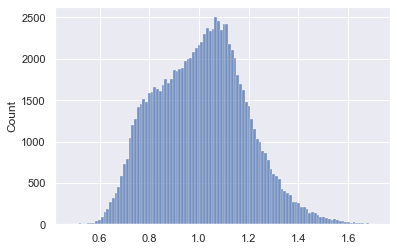

In [13]:
sns.histplot(portf_sharpe_ratio)

In [14]:
data = {'Returns':p_ret, 
        'Volatility':p_vol,
        'sharpe_ratio':portf_sharpe_ratio
       }

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [15]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,sharpe_ratio,AAPL weight,GOOGL weight,AMZN weight,TSLA weight
0,0.023040,0.251453,1.448731,0.584583,0.065916,0.305464,0.044036
1,0.016121,0.239393,1.064745,0.326417,0.444213,0.214037,0.015333
2,0.017870,0.335962,0.841024,0.202727,0.236007,0.043479,0.517787
3,0.018684,0.238833,1.236943,0.458204,0.402155,0.099601,0.040039
4,0.016410,0.291488,0.890151,0.169539,0.270890,0.185482,0.374089


[Text(0.5, 0, 'Volatility'),
 Text(0, 0.5, 'Expected Returns'),
 Text(0.5, 1.0, 'Efficient Frontier')]

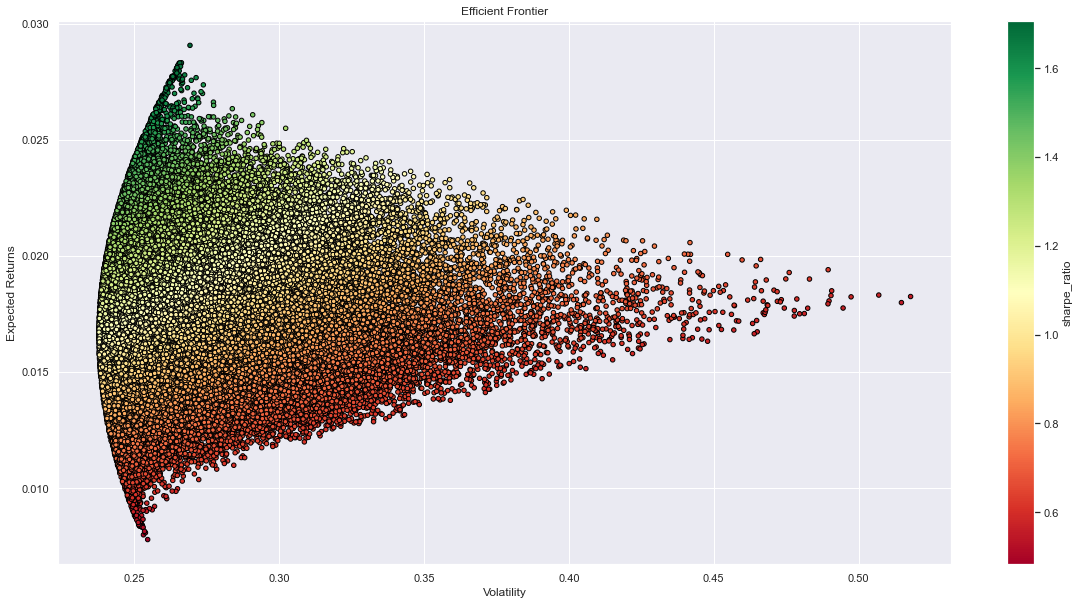

In [16]:
# Plot efficient frontier
fig, ax = plt.subplots(figsize=(20,10))
portfolios.plot(kind='scatter',
                x='Volatility',
                y=['Returns'],
                marker='o',
                s=20,
                c='sharpe_ratio',
                cmap='RdYlGn',
                alpha=1,
                edgecolors='black',
                grid=True,
                ax=ax
                )
ax.set(xlabel='Volatility',
                  ylabel='Expected Returns',
                  title='Efficient Frontier')

In [17]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.016741
Volatility      0.237827
sharpe_ratio    1.112970
AAPL weight     0.372990
GOOGL weight    0.487553
AMZN weight     0.093100
TSLA weight     0.046357
Name: 59815, dtype: float64

In [18]:
max_sharpe_port = portfolios.iloc[portfolios['sharpe_ratio'].idxmax()]
# idxmax() gives us the max value in the column specified.                               
max_sharpe_port

Returns         0.029064
Volatility      0.269244
sharpe_ratio    1.706808
AAPL weight     0.936084
GOOGL weight    0.013912
AMZN weight     0.026124
TSLA weight     0.023880
Name: 81432, dtype: float64

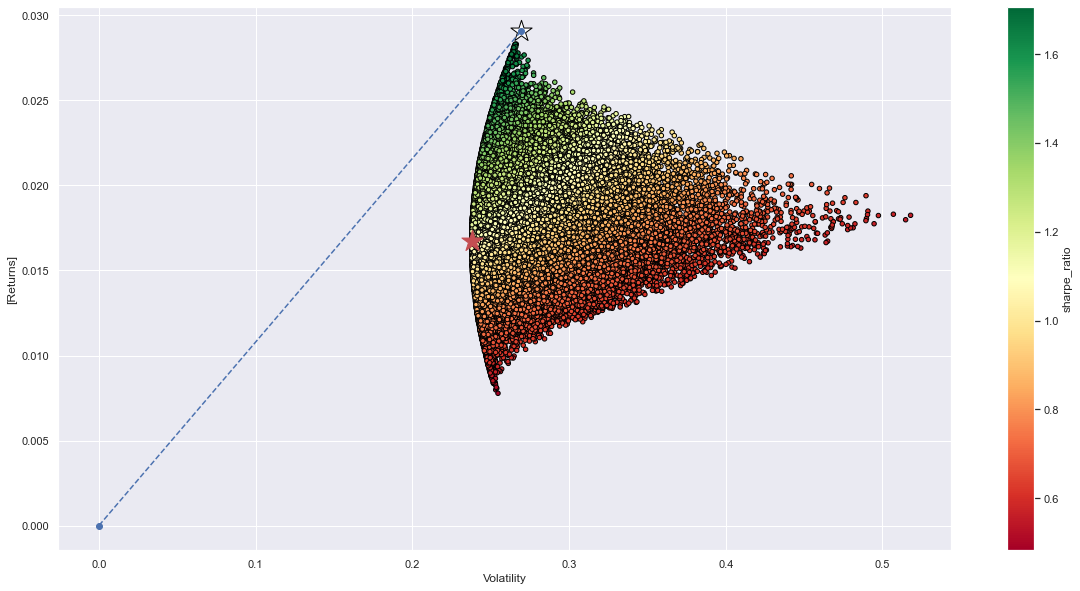

In [19]:
# plotting the minimum volatility portfolio
fig, ax = plt.subplots(figsize=[20,10])
portfolios.plot(kind='scatter',
                x='Volatility',
                y=['Returns'],
                marker='o',
                s=20,
                c='sharpe_ratio',
                cmap='RdYlGn',
                alpha=1,
                edgecolors='black',
                grid=True,
                ax=ax
                )
plt.scatter(min_vol_port[1], 
            min_vol_port[0], 
            color='r', 
            marker='*', 
            s=500
           )
plt.scatter(max_sharpe_port[1], 
            max_sharpe_port[0], 
            color='white', 
            edgecolors='black',
            marker='*', 
            s=500
           )
x_values = [0, max_sharpe_port[1]]
y_values = [0, max_sharpe_port[0]]
plt.plot(x_values, y_values, 'bo', linestyle="--")

<AxesSubplot:ylabel='Count'>

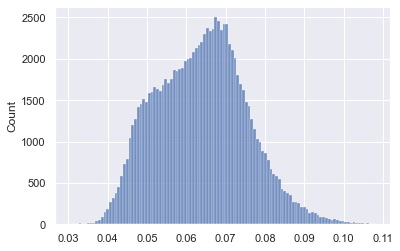

In [20]:
sns.histplot(portfolios['Returns']/portfolios['Volatility'])

In [21]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.029064
Volatility      0.269244
sharpe_ratio    1.706808
AAPL weight     0.936084
GOOGL weight    0.013912
AMZN weight     0.026124
TSLA weight     0.023880
Name: 81432, dtype: float64

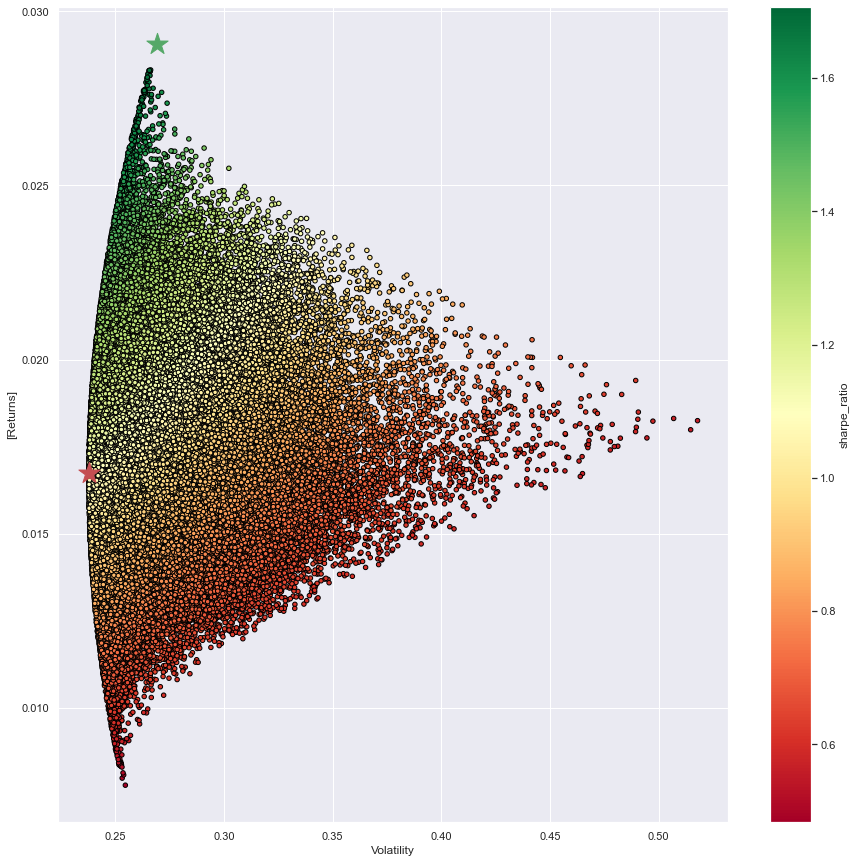

In [22]:
# Plotting optimal portfolio
fig, ax = plt.subplots(figsize=(10, 10))
portfolios.plot(kind='scatter',
                x='Volatility',
                y=['Returns'],
                marker='o',
                s=20,
                c='sharpe_ratio',
                cmap='RdYlGn',
                alpha=1,
                edgecolors='black',
                grid=True,
                figsize=(15,15),
                ax=ax
                )
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)